In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process

In [4]:
from datagovindia import DataGovIndia
datagovin = DataGovIndia() 

In [5]:
search_data = datagovin.search('onion') 

In [6]:
search_data

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
0,4319d311-87b0-410a-b0db-d9beff49c079,Month-wise Average All-India Retail Price Tren...,Month-wise Average All-India Retail Price Tren...,Central,"[document_id, year, category, january, februar...",[Rajya Sabha],data.gov.in,[All],2024-03-20T15:31:40+00:00,2024-03-27T12:00:13+00:00
1,ce04d031-cd1f-4b92-a80d-70ef0e55e495,State-wise Production of Onion during 2015-16 ...,State-wise Production of Onion during 2015-16 ...,Central,"[document_id, state, __2015_16, __2016_17, res...",[Rajya Sabha],data.gov.in,[All],2023-12-14T12:30:54+00:00,2023-12-15T10:02:29+00:00
2,a699b6ee-7b92-46bb-95fb-56a9a47eb31a,State/ UT-wise Daily Retail Prices of Onion fr...,State/ UT-wise Daily Retail Prices of Onion fr...,Central,"[document_id, states__uts, daily_retail_price_...",[Rajya Sabha],data.gov.in,[All],2023-12-14T18:01:16+00:00,2023-12-15T09:58:18+00:00
3,6f682970-8df3-45eb-96b2-c9846c8383fa,State/ UT-wise Production of Onion from 2013-1...,State/ UT-wise Production of Onion from 2013-1...,Central,"[document_id, states__uts, __2013_14, __2014_1...",[Rajya Sabha],data.gov.in,[All],2023-12-14T17:08:02+00:00,2023-12-15T09:54:11+00:00
4,35839665-e707-472a-b950-870e63535b53,State-wise Area under Onion from 2019-20 to 20...,State-wise Area under Onion from 2019-20 to 20...,Central,"[document_id, sl__no_, states, _2018_19, _2019...",[Rajya Sabha],data.gov.in,[All],2023-12-09T09:08:31+00:00,2023-12-12T10:08:31+00:00
5,cc89c3ae-4042-41d3-9b38-8fd1fef27f4d,Average Wholesale Prices of Onion Prevailing i...,Average Wholesale Prices of Onion Prevailing i...,Central,"[document_id, states, current_week_09_08_2016,...",[Rajya Sabha],data.gov.in,[All],2023-12-06T21:05:43+00:00,2023-12-07T10:36:14+00:00
6,c107432d-4dbb-4e0c-8caa-6ce011df6ce3,Date-wise Arrivals & Prices of Onions at Bhram...,Date-wise Arrivals & Prices of Onions at Bhram...,Central,"[document_id, date, arrivals_in_tons, _wholesa...",[Rajya Sabha],data.gov.in,[All],2023-12-05T19:04:38+00:00,2023-12-06T09:59:07+00:00
7,8ba0d98c-0fd0-49e2-b5f0-556c72b65d43,Production of Onion during 2012-13 to 2014-15 ...,Production of Onion during 2012-13 to 2014-15 ...,Central,"[document_id, _sl__no_, _year, production_of_o...",[Rajya Sabha],data.gov.in,[All],2023-10-21T18:55:27+00:00,2023-10-23T16:14:47+00:00
8,ab99a3a7-4b60-4dcc-94e8-d31e75edfd92,Physical and Financial achievement for setting...,Physical and Financial achievement for setting...,Central,"[document_id, sl__no_, nhm_hmneh_states, onion...",[Rajya Sabha],data.gov.in,[All],2023-10-21T18:01:27+00:00,2023-10-23T16:12:53+00:00
9,5fd06a97-41e9-44f3-9693-12ec07beafeb,State/UT-wise Production of Onion from 2015-16...,State/UT-wise Production of Onion from 2015-16...,Central,"[document_id, states_uts, __2015_16, __2016_17...",[Rajya Sabha],data.gov.in,[All],2023-10-20T08:32:22+00:00,2023-10-23T15:04:14+00:00


In [7]:

search_term = " Consumer Affairs"

def find_similar_rows(search_data, column_name, search_term, threshold=80):
    # Create a mapping of index to choice values
    choices = search_data[column_name].tolist()
    index_mapping = {i: choice for i, choice in enumerate(choices)}
    
    # Perform fuzzy matching
    matches = process.extract(search_term, choices, limit=None)
    
    # Debug: Print the matches and scores
    # print("Matches and Scores:")
    # for match in matches:
        # print(match)
    
    # Create a DataFrame from the matches
    matches_df = pd.DataFrame(matches, columns=['match', 'score'])
    
    # Debug: Print the matches DataFrame
    # print("\nMatches DataFrame:")
    # print(matches_df)
    
    # Filter matches above the threshold
    matches_above_threshold = matches_df[matches_df['score'] >= threshold]
    
    # Debug: Print the filtered matches
    # print("\nFiltered Matches Above Threshold:")
    # print(matches_above_threshold)
    
    # Get the original indices of the matching rows
    matching_indices = [i for i, choice in enumerate(choices) if any(match == choice for match, score in matches if score >= threshold)]
    
    # Debug: Print the matching indices
    # print("\nMatching Indices:")
    # print(matching_indices)
    
    # Retrieve rows corresponding to the matching indices
    similar_rows = search_data.iloc[matching_indices]
    return pd.DataFrame(similar_rows)

# Find similar rows
similar_rows_df = find_similar_rows(search_data, 'sectors', search_term)

# print("\nSimilar Rows:")
similar_rows_df

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
24,522e708a-8c44-47d5-80c5-b62bf357f2b8,Daily wholesale price of Onion upto April - 2015,Daily wholesale price of Onion upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
25,8daef6b2-f1c8-4ddf-8b6a-a4353bd4b53e,Weekly wholesale price of Onion upto 2012,Weekly wholesale price of Onion upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00


In [8]:
onion_week = datagovin.get_data("8daef6b2-f1c8-4ddf-8b6a-a4353bd4b53e")

In [9]:
onion_week.head()

,date,zone,centre,price
0,06-01-93,1,HISAR,NA
1,06-01-93,1,KARNAL,NA
2,06-01-93,1,SHIMLA,NA
3,06-01-93,1,MANDI,NA
4,06-01-93,1,SRINAGAR,NA


In [10]:
onion_week['zone'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [11]:
onion_zone1 = onion_week[onion_week['zone'] == '1']
onion_zone2 = onion_week[onion_week['zone'] == '2']
onion_zone3 = onion_week[onion_week['zone'] == '3']
onion_zone4 = onion_week[onion_week['zone'] == '4']
onion_zone = 0

In [12]:
onion_zone1.loc[onion_zone1['price'] == 'NA', 'price'] = np.nan
onion_zone2.loc[onion_zone2['price'] == 'NA', 'price'] = np.nan
onion_zone3.loc[onion_zone3['price'] == 'NA', 'price'] = np.nan
onion_zone4.loc[onion_zone4['price'] == 'NA', 'price'] = np.nan

/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_17719/887071434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion_zone1.loc[onion_zone1['price'] == 'NA', 'price'] = np.nan
/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_17719/887071434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion_zone2.loc[onion_zone2['price'] == 'NA', 'price'] = np.nan
/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_17719/887071434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [13]:
onion_zone1 = onion_zone1.reset_index(drop=True)
onion_zone2 = onion_zone2.reset_index(drop=True)
onion_zone3 = onion_zone3.reset_index(drop=True)
onion_zone4 = onion_zone4.reset_index(drop=True)

In [14]:
onion_zone1['date'] = pd.to_datetime(onion_zone1['date'], format='%d-%m-%y')
onion_zone2['date'] = pd.to_datetime(onion_zone2['date'], format='%d-%m-%y')
onion_zone3['date'] = pd.to_datetime(onion_zone3['date'], format='%d-%m-%y')
onion_zone4['date'] = pd.to_datetime(onion_zone4['date'], format='%d-%m-%y')

In [15]:
print(onion_zone1.dtypes)

date      datetime64[ns]
zone              object
centre            object
price             object
dtype: object


In [16]:
onion_zone1['price'] = pd.to_numeric(onion_zone1['price'], errors='coerce')
onion_zone2['price'] = pd.to_numeric(onion_zone2['price'], errors='coerce')
onion_zone3['price'] = pd.to_numeric(onion_zone3['price'], errors='coerce')
onion_zone4['price'] = pd.to_numeric(onion_zone4['price'], errors='coerce')

In [17]:
onion_zone1_average_prices = onion_zone1.groupby('date')['price'].mean().reset_index().round(2)
onion_zone2_average_prices = onion_zone2.groupby('date')['price'].mean().reset_index().round(2)
onion_zone3_average_prices = onion_zone3.groupby('date')['price'].mean().reset_index().round(2)
onion_zone4_average_prices = onion_zone4.groupby('date')['price'].mean().reset_index().round(2)


In [18]:
onion_zone1_average_prices = onion_zone1_average_prices[341:]
onion_zone2_average_prices = onion_zone2_average_prices[341:]
onion_zone3_average_prices = onion_zone3_average_prices[341:]
onion_zone4_average_prices = onion_zone4_average_prices[341:]


In [19]:
# Caution: Files Stores in Local
onion_zone1_average_prices.to_csv('../dataset/onion/onion_zone1_average_prices.csv', sep=',', index=False, encoding='utf-8')
onion_zone2_average_prices.to_csv('../dataset/onion/onion_zone2_average_prices.csv', sep=',', index=False, encoding='utf-8')
onion_zone3_average_prices.to_csv('../dataset/onion/onion_zone3_average_prices.csv', sep=',', index=False, encoding='utf-8')
onion_zone4_average_prices.to_csv('../dataset/onion/onion_zone4_average_prices.csv', sep=',', index=False, encoding='utf-8')

<Axes: xlabel='date', ylabel='price'>

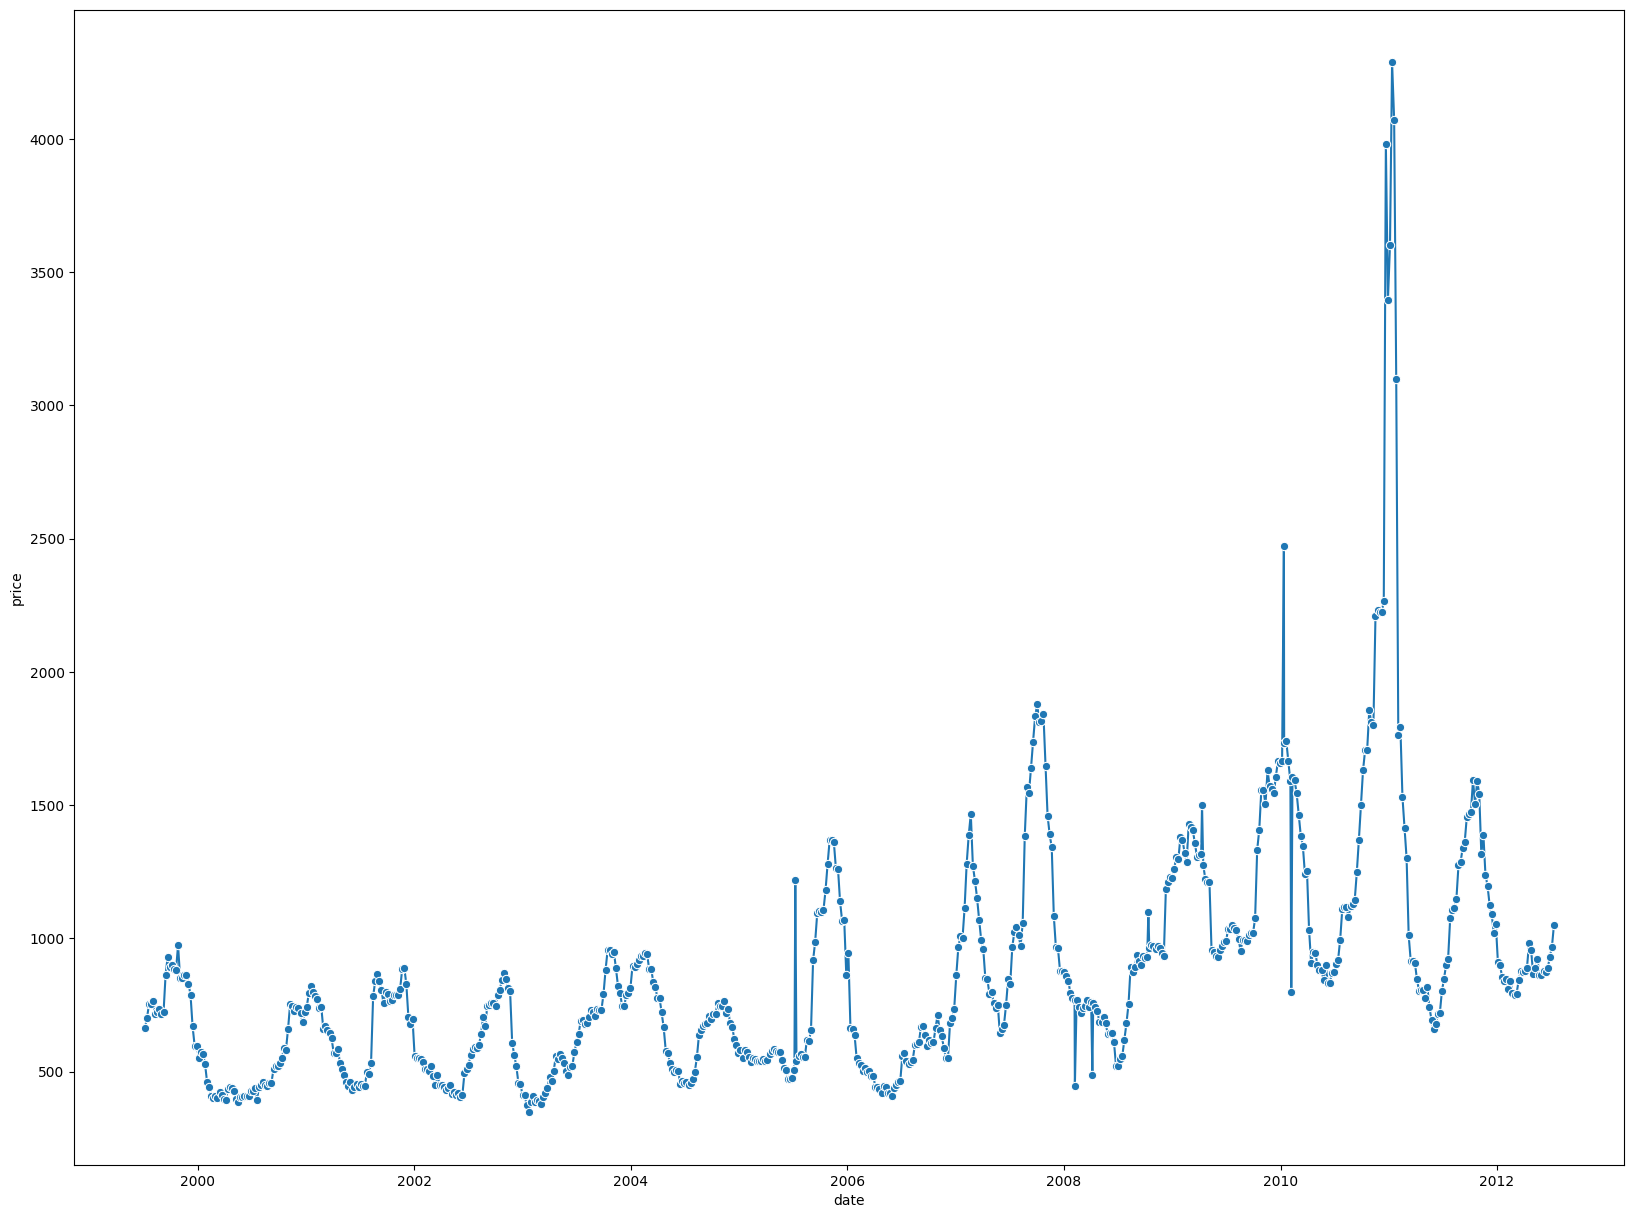

In [20]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=onion_zone1_average_prices, marker='o')

<Axes: xlabel='date', ylabel='price'>

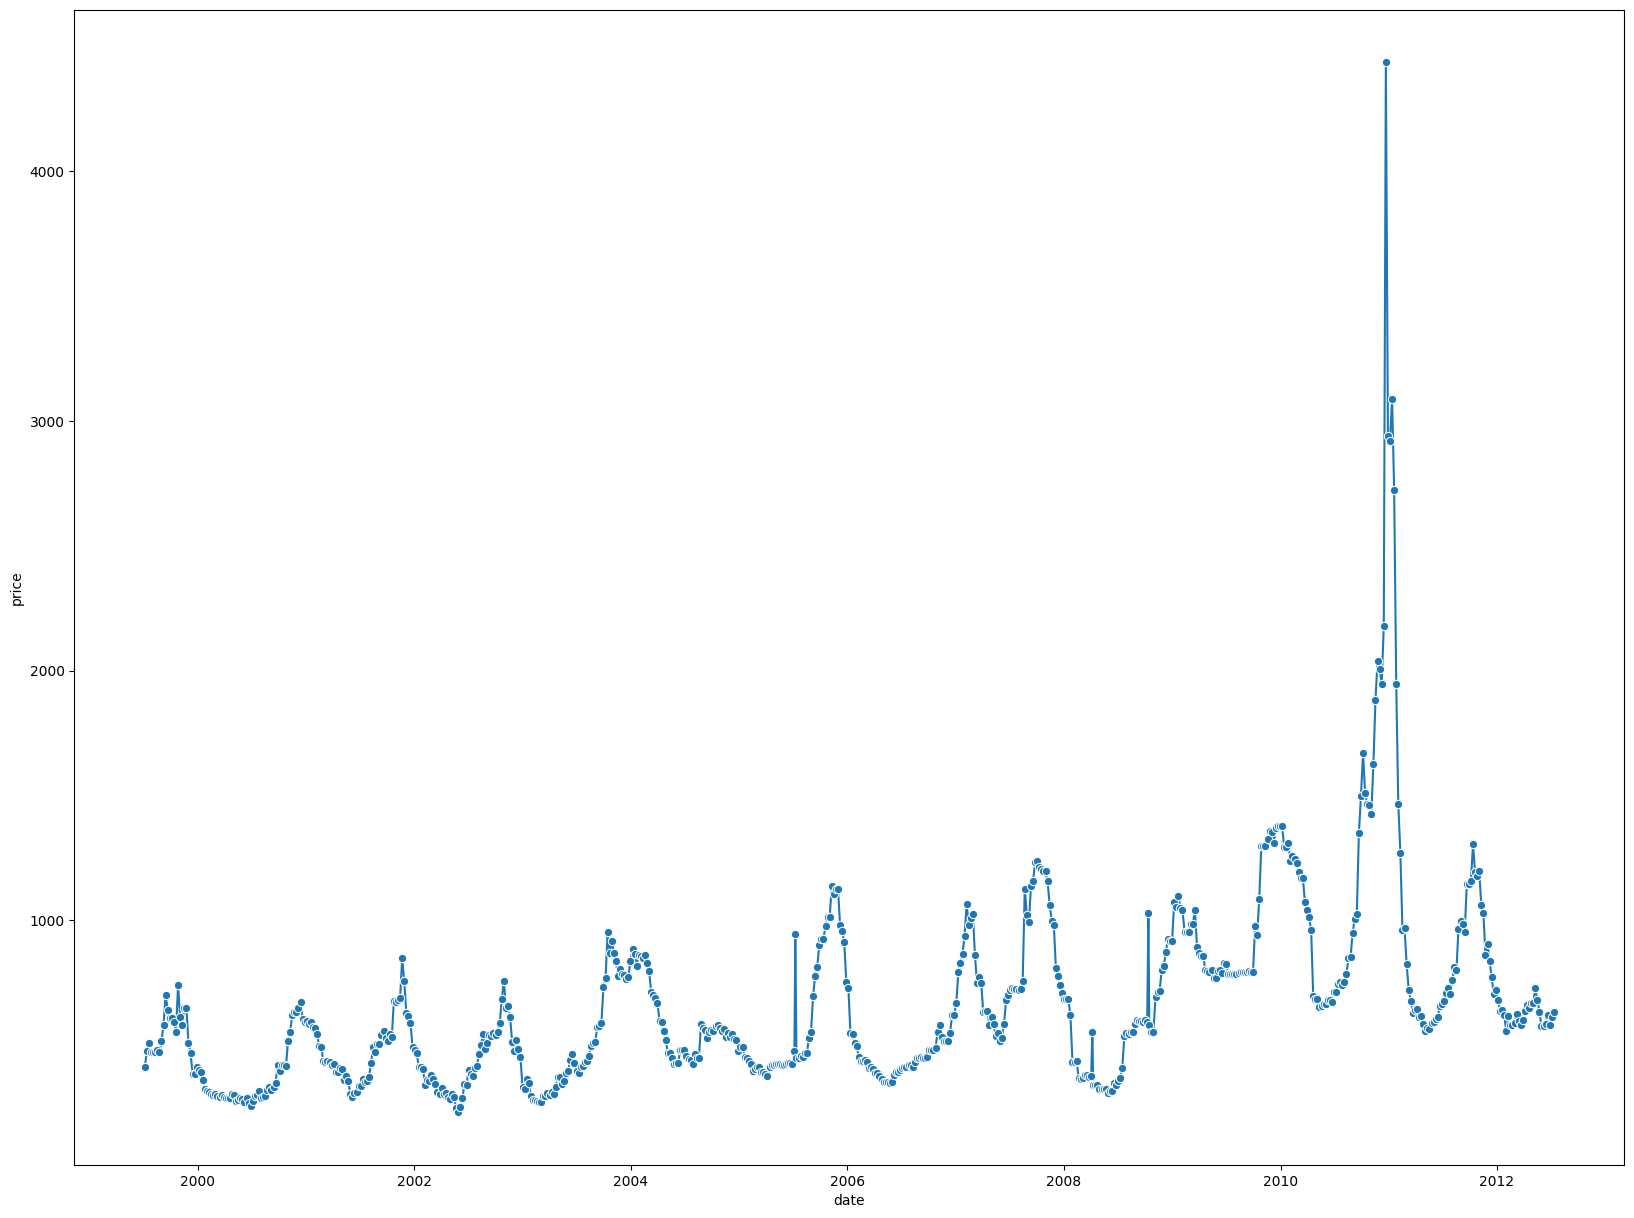

In [21]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=onion_zone2_average_prices, marker='o')

<Axes: xlabel='date', ylabel='price'>

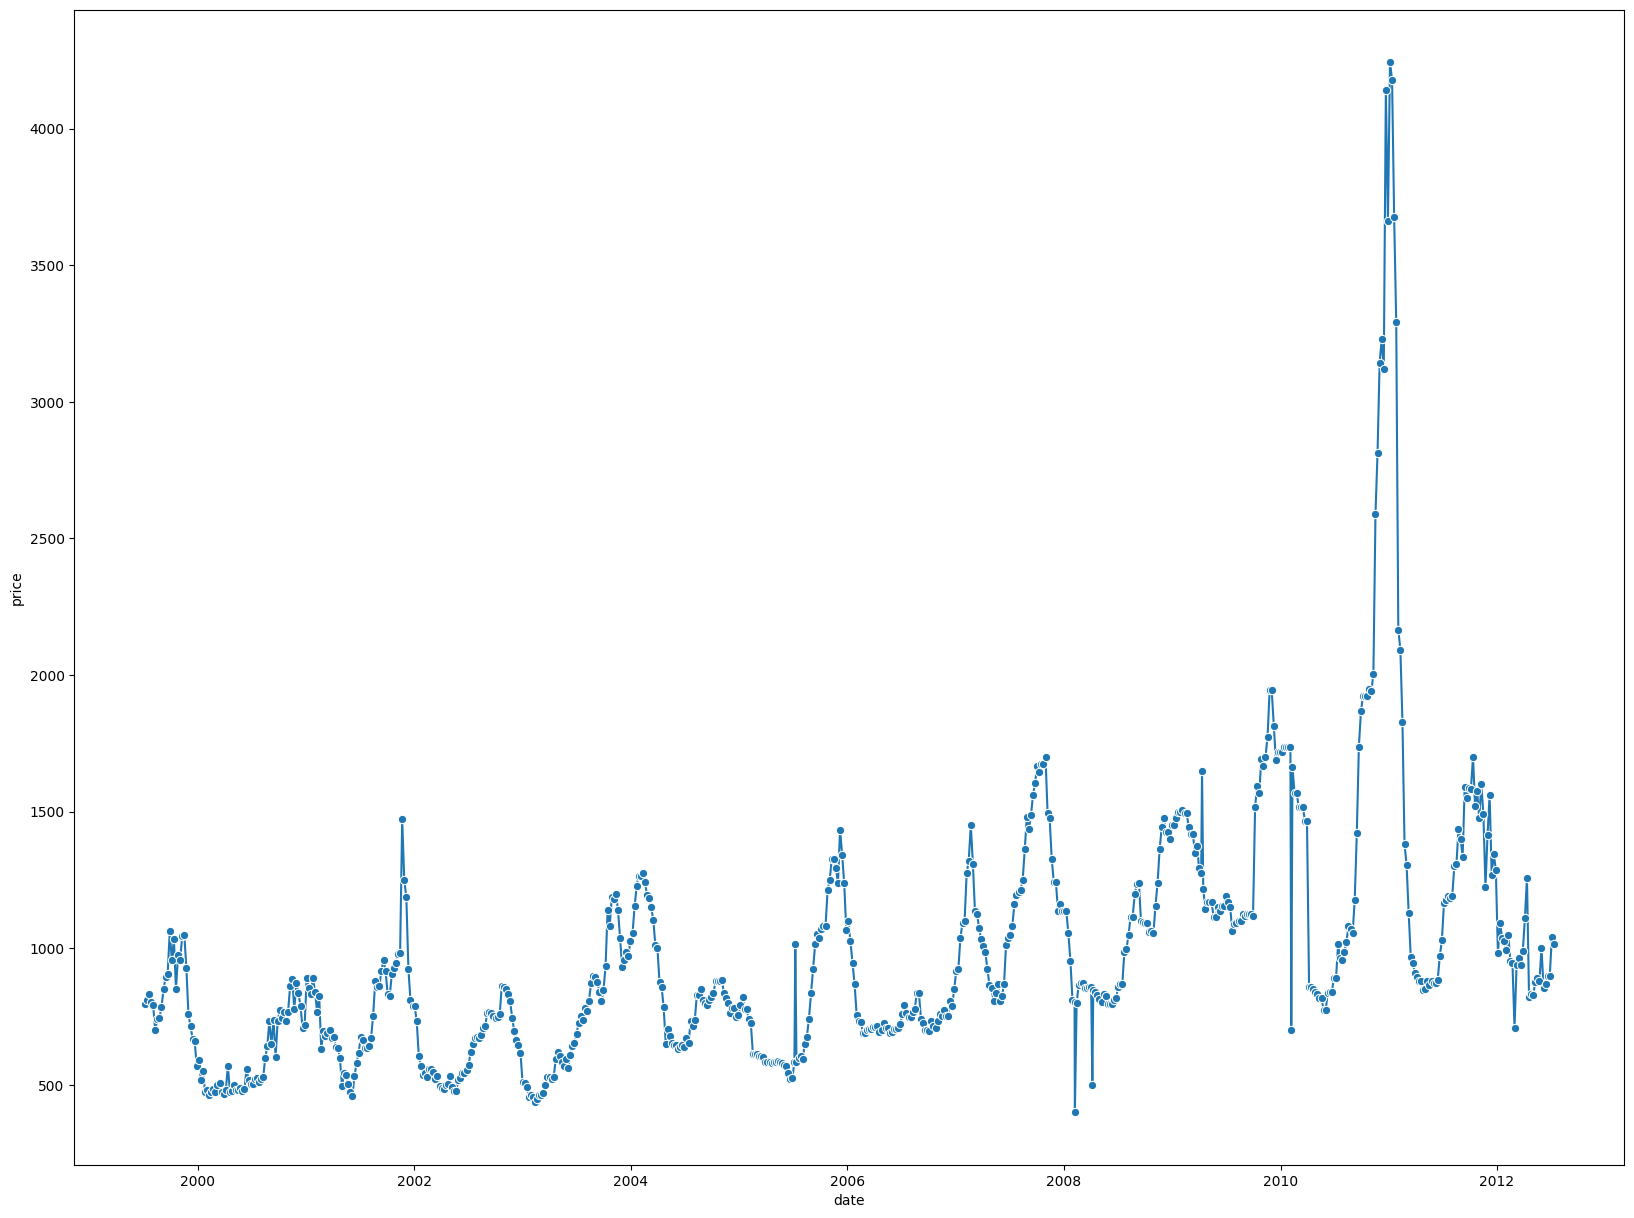

In [22]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=onion_zone3_average_prices, marker='o')

<Axes: xlabel='date', ylabel='price'>

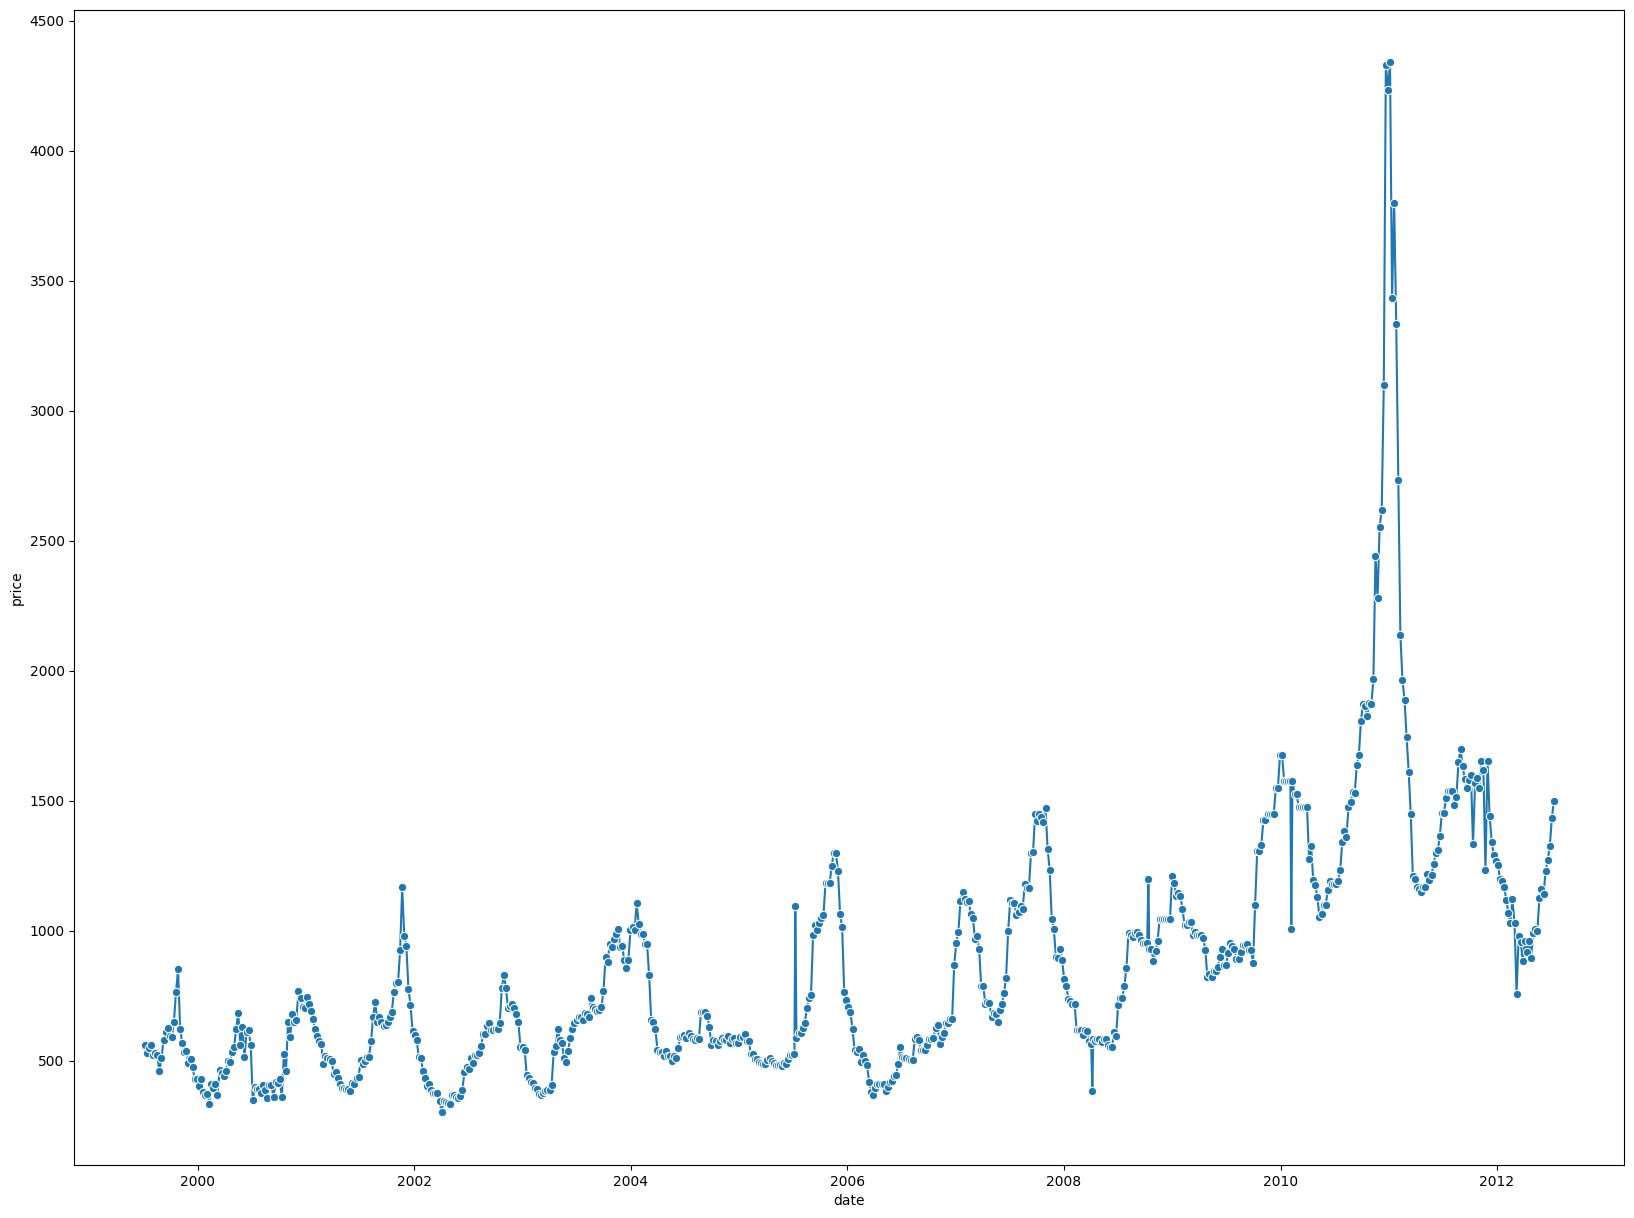

In [23]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=onion_zone4_average_prices, marker='o')

# End -- Onion_Weekly